# Payment Date Prediction 


### Importing related Libraries 

In [128]:
import numpy as np
import pandas as pd
import pickle
import datetime
from sklearn.model_selection import train_test_split

### Store the dataset into the Dataframe


In [129]:
data=pd.read_csv('NewDataset.csv')

### Check the shape of the dataframe


In [130]:
data.shape

(50099, 19)

### Check the Detail information of the dataframe

In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50099 entries, 0 to 50098
Data columns (total 19 columns):
business_code             50099 non-null object
cust_number               50099 non-null object
name_customer             50099 non-null object
clear_date                40000 non-null object
buisness_year             50099 non-null int64
doc_id                    50099 non-null int64
posting_date              50099 non-null object
document_create_date      50099 non-null int64
document_create_date.1    50099 non-null int64
due_in_date               50099 non-null int64
invoice_currency          50099 non-null object
document type             50099 non-null object
posting_id                50099 non-null int64
area_business             0 non-null float64
total_open_amount         50099 non-null float64
baseline_create_date      50099 non-null int64
cust_payment_terms        50099 non-null object
invoice_id                50093 non-null float64
isOpen                    50099 non

### Display All the column names

In [132]:
print("Columns of the dataframe are:\n",data.columns)

Columns of the dataframe are:
 Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')


### Describe the entire dataset

In [133]:
data.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50099.000000,5.009900e+04,5.009900e+04,5.009900e+04,5.009900e+04,50099.0,0.0,50099.000000,5.009900e+04,5.009300e+04,50099.000000
mean,2019.307072,2.014112e+09,2.019353e+07,2.019355e+07,2.019369e+07,1.0,NaN,32456.565546,2.019355e+07,2.013216e+09,0.201581
std,0.461284,2.912992e+08,4.501712e+03,4.487779e+03,4.475909e+03,0.0,NaN,39259.249400,4.488339e+03,2.795573e+08,0.401185
min,2019.000000,1.928502e+09,2.018123e+07,2.018123e+07,2.018122e+07,1.0,NaN,0.720000,2.018121e+07,1.928502e+09,0.000000
25%,2019.000000,1.929343e+09,2.019051e+07,2.019051e+07,2.019052e+07,1.0,NaN,4943.480000,2.019051e+07,1.929343e+09,0.000000
50%,2019.000000,1.929968e+09,2.019091e+07,2.019091e+07,2.019093e+07,1.0,NaN,17700.000000,2.019091e+07,1.929968e+09,0.000000
75%,2020.000000,1.930621e+09,2.020013e+07,2.020013e+07,2.020022e+07,1.0,NaN,47385.590000,2.020013e+07,1.930621e+09,0.000000
max,2020.000000,9.500000e+09,2.020052e+07,2.020052e+07,2.020071e+07,1.0,NaN,668593.360000,2.020052e+07,2.960636e+09,1.000000


# Data Cleaning

- Show top 5 records from the dataset

In [134]:
#using head() to display first 5 records of the dataset
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200769623,WAL-MAR corp,11-02-2020 00:00,2020,1930438491,26-01-2020,20200125,20200126,20200210,USD,RV,1,NaN,54273.28,20200126,NAH4,1.930438e+09,0
1,U001,200980828,BEN E,08-08-2019 00:00,2019,1929646410,22-07-2019,20190722,20190722,20190811,USD,RV,1,NaN,79656.60,20190722,NAD1,1.929646e+09,0
2,U001,200792734,MDV/ trust,30-12-2019 00:00,2019,1929873765,14-09-2019,20190914,20190914,20190929,USD,RV,1,NaN,2253.86,20190914,NAA8,1.929874e+09,0
3,CA02,140105686,SYSC llc,NaN,2020,2960623488,30-03-2020,20200330,20200330,20200410,CAD,RV,1,NaN,3299.70,20200331,CA10,2.960623e+09,1
4,U001,200769623,WAL-MAR foundation,25-11-2019 00:00,2019,1930147974,13-11-2019,20191113,20191113,20191128,USD,RV,1,NaN,33133.29,20191113,NAH4,1.930148e+09,0


### Display the Null values percentage against every columns (compare to the total number of records)

- Output expected : area_business - 100% null, clear_data = 20% null, invoice_id = 0.12% null

In [135]:
#using isnull() to get null values from a column, using sum() to add the count of null values and finall dividing by the length to get the perccentage
data.isnull().sum()/len(data)*100

business_code               0.000000
cust_number                 0.000000
name_customer               0.000000
clear_date                 20.158087
buisness_year               0.000000
doc_id                      0.000000
posting_date                0.000000
document_create_date        0.000000
document_create_date.1      0.000000
due_in_date                 0.000000
invoice_currency            0.000000
document type               0.000000
posting_id                  0.000000
area_business             100.000000
total_open_amount           0.000000
baseline_create_date        0.000000
cust_payment_terms          0.000000
invoice_id                  0.011976
isOpen                      0.000000
dtype: float64

### Display Invoice_id and Doc_Id

- Note - Many of the would have same invoice_id and doc_id


In [136]:
data[['invoice_id','doc_id']]

,invoice_id,doc_id
0,1.930438e+09,1930438491
1,1.929646e+09,1929646410
2,1.929874e+09,1929873765
3,2.960623e+09,2960623488
4,1.930148e+09,1930147974
5,2.960581e+09,2960581231
6,1.930083e+09,1930083373
7,1.930659e+09,1930659387
8,1.929440e+09,1929439637
9,1.928819e+09,1928819386


#### Write a code to check - 'baseline_create_date',"document_create_date",'document_create_date.1' - these columns are almost same.

- Please note, if they are same, we need to drop them later



In [137]:
#creating a new column 'Common' using np.where() which will store 'Yes' if elements are same and 'No' otherwise 
data['Common'] = np.where((data['baseline_create_date'] == data['document_create_date']) & (
    data['document_create_date'] == data['document_create_date.1']), 'Yes', 'No')
data[['baseline_create_date','document_create_date','document_create_date.1','Common']]

,baseline_create_date,document_create_date,document_create_date.1,Common
0,20200126,20200125,20200126,No
1,20190722,20190722,20190722,Yes
2,20190914,20190914,20190914,Yes
3,20200331,20200330,20200330,No
4,20191113,20191113,20191113,Yes
5,20190924,20190920,20190920,No
6,20191101,20191031,20191101,No
7,20200319,20200318,20200319,No
8,20190607,20190605,20190607,No
9,20190220,20190219,20190220,No


#### Please check, Column 'posting_id' is constant columns or not


In [138]:
#using nunique method of pandas to check which columns in the dataframe are constant
data.columns[data.nunique() <= 1]

Index(['posting_id', 'area_business'], dtype='object')

#### Please check 'isOpen' is a constant column and relevant column for this project or not

In [139]:
data.columns[data.nunique() <= 1]

Index(['posting_id', 'area_business'], dtype='object')

As can be seen above, 'isOpen' column is not there in the produced list which states that 'isOpen' is not a constant column. Although it is not a constant column, it's values are not useful for us.

### Write the code to drop all the following columns from the dataframe

- 'area_business'
- "posting_id"
- "invoice_id"
- "document_create_date"
- "isOpen"
- 'document type' 
- 'document_create_date.1

In [140]:
data=data.drop(['area_business','posting_id','invoice_id',"document_create_date","isOpen",'document type','document_create_date.1','Common'], axis = 1)


### Please check from the dataframe whether all the columns are removed or not 

In [141]:
#checking if mentioned columns are present or not using if-else
if 'area_business' in data.columns:
  print('Present')
elif 'posting_id' in data.columns:
  print('Present')
elif "invoice_id" in data.columns:
  print('Present')
elif "document_create_date" in data.columns:
  print('Present')
elif "isOpen" in data.columns:
  print('Present')
elif 'document type' in data.columns:
  print('Present')
elif 'document_create_date.1' in data.columns:
  print('Present')
else:
  print('Mentioned columns are not present')

Mentioned columns are not present


### Show all the Dublicate rows from the dataframe

In [142]:
duplicate = data[data.duplicated()]
 
print("Duplicate Rows :")
 
duplicate

Duplicate Rows :


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
1041,U001,200769623,WAL-MAR in,12-03-2019 00:00,2019,1928870382,28-02-2019,20190315,USD,19557.41,20190228,NAH4
2400,U001,200769623,WAL-MAR trust,28-08-2019 00:00,2019,1929758460,18-08-2019,20190902,USD,5600.41,20190818,NAH4
2584,U001,200769623,WAL-MAR corporation,16-12-2019 00:00,2019,1930216806,04-12-2019,20191219,USD,35352.17,20191204,NAH4
3755,U001,200769623,WAL-MAR,22-11-2019 00:00,2019,1930137035,12-11-2019,20191127,USD,2982.64,20191112,NAH4
3873,CA02,140104409,LOB associates,NaN,2020,2960628616,14-04-2020,20200425,CAD,82975.82,20200415,CA10
3982,U001,200353024,DECA llc,01-04-2019 00:00,2019,1929003934,21-03-2019,20190408,USD,246.60,20190316,NAM4
4012,U001,200769623,WAL-MAR foundation,18-12-2019 00:00,2019,1930229516,08-12-2019,20191223,USD,3795.00,20191208,NAH4
4464,U001,200769623,WAL-MAR llc,08-04-2019 00:00,2019,1929027308,27-03-2019,20190411,USD,71047.42,20190327,NAH4
4500,U001,200943423,SHEET,01-11-2019 00:00,2019,1930023823,18-10-2019,20191102,USD,15924.76,20191018,NAA8
4588,U001,200561861,CO corporation,13-09-2019 00:00,2019,1929811719,30-08-2019,20190914,USD,143326.89,20190830,NAA8


### Display the Number of Dublicate Rows

In [143]:
print('Number of Duplicate Rows:', len(duplicate))

Number of Duplicate Rows: 1162


### Drop all the Dublicate Rows

In [144]:
data=data.drop_duplicates()

#### Now check for all dublicate rows now

- Note - It must be 0 by now

In [145]:
duplicate_new = data[data.duplicated()]
 
print('Number of Duplicate Rows:', len(duplicate_new))

Number of Duplicate Rows: 0


### Check for the number of Rows and Columns in your dataset

In [146]:
rows = len(data.axes[0])
cols = len(data.axes[1])
print('Number of Rows:', rows)
print('Number of Columns:', cols)

Number of Rows: 48937
Number of Columns: 12


### Find out the total count of null values in each columns

In [147]:
data.isnull().sum()

business_code              0
cust_number                0
name_customer              0
clear_date              9779
buisness_year              0
doc_id                     0
posting_date               0
due_in_date                0
invoice_currency           0
total_open_amount          0
baseline_create_date       0
cust_payment_terms         0
dtype: int64

#Data type Conversion 

### Please check the data type of each column of the dataframe

In [148]:
data.dtypes

business_code            object
cust_number              object
name_customer            object
clear_date               object
buisness_year             int64
doc_id                    int64
posting_date             object
due_in_date               int64
invoice_currency         object
total_open_amount       float64
baseline_create_date      int64
cust_payment_terms       object
dtype: object

### Check the datatype format of below columns

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date

In [149]:
#creating a list to contain the required columns, then converting it into a dataframe to check their data types
cols = ['clear_date', 'posting_date','due_in_date','baseline_create_date']
df=pd.DataFrame(cols)
print(df)
print('\n')
print(df.dtypes)

                      0
0            clear_date
1          posting_date
2           due_in_date
3  baseline_create_date


0    object
dtype: object


### converting date columns into date time formats

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date


- **Note - You have to convert all these above columns into "%Y%m%d" format**

In [150]:
data['clear_date'] = pd.to_datetime(data['clear_date'])
data['posting_date'] = pd.to_datetime(data['posting_date'])
data['due_in_date'] = pd.to_datetime(data['due_in_date'], format = '%Y%m%d',errors = 'coerce')
data['baseline_create_date'] = pd.to_datetime(data['baseline_create_date'], format = '%Y%m%d',errors = 'coerce')


### Please check the datatype of all the columns after conversion of the above 4 columns

In [151]:
data.dtypes

business_code                   object
cust_number                     object
name_customer                   object
clear_date              datetime64[ns]
buisness_year                    int64
doc_id                           int64
posting_date            datetime64[ns]
due_in_date             datetime64[ns]
invoice_currency                object
total_open_amount              float64
baseline_create_date    datetime64[ns]
cust_payment_terms              object
dtype: object

#### the invoice_currency column contains two different categories, USD and CAD

- Please do a count of each currency 

In [152]:
data['invoice_currency'].value_counts()

USD    45011
CAD     3926
Name: invoice_currency, dtype: int64

#### display the "total_open_amount" column value

In [153]:
data['total_open_amount'].sum()

1587521583.53

### Convert all CAD into USD currency of "total_open_amount" column

- 1 CAD = 0.7 USD
- Create a new column i.e "converted_usd" and store USD and convered CAD to USD

In [155]:
#creating a dictionary with keys of currencies, and their conversion rates as values
#then creating the required column 'converted_usd' and storing values of converted CAD to USD by applying lambda function over the required entries
currencies = data.invoice_currency.unique().tolist()
currencies = dict.fromkeys(currencies, np.nan)
currencies['CAD'] = 1.43
currencies['USD'] = 1.0
data['converted_usd'] = data.apply(lambda x: x.total_open_amount / currencies[x.invoice_currency], axis=1 )

### Display the new "converted_usd" column values

In [156]:
data['converted_usd']

0         54273.280000
1         79656.600000
2          2253.860000
3          2307.482517
4         33133.290000
5         15542.545455
6          7358.490000
7         11173.020000
8         15995.040000
9            28.630000
10         3525.590000
11       103147.370000
12        16381.450000
13        19581.570000
14       121105.650000
15         3726.060000
16         5181.510000
17        19082.140000
18        12819.500000
19        53349.540000
20         5683.500000
21        11845.190000
22         5893.010000
23        20079.580000
24        11307.780000
25        64917.671329
26        36188.110000
27        11380.830000
28          412.090000
29        33855.440559
             ...      
50069     64917.671329
50070     64917.671329
50071     64917.671329
50072     64917.671329
50073     64917.671329
50074     64917.671329
50075     64917.671329
50076     64917.671329
50077     64917.671329
50078     64917.671329
50079     64917.671329
50080     64917.671329
50081     6

### Display year wise total number of record 

- Note -  use "buisness_year" column for this 

In [157]:
g1 = data.groupby(["buisness_year"]).size()
g1

buisness_year
2019    33975
2020    14962
dtype: int64

### Write the code to delete the following columns 

- 'invoice_currency'
- 'total_open_amount', 

In [158]:
data=data.drop(['invoice_currency','total_open_amount'],axis=1)

### Write a code to check the number of columns in dataframe

In [159]:
print('Total Columns:',len(data.columns))

Total Columns: 11


# Splitting the Dataset 

### Look for all columns containing null value

- Note - Output expected is only one column 

In [160]:
data.isnull().any()

business_code           False
cust_number             False
name_customer           False
clear_date               True
buisness_year           False
doc_id                  False
posting_date            False
due_in_date             False
baseline_create_date    False
cust_payment_terms      False
converted_usd           False
dtype: bool

#### Find out the number of null values from the column that you got from the above code

In [161]:
print('Number of Null values in clear_date:',data['clear_date'].isnull().sum())

Number of Null values in clear_date: 9779


### On basis of the above column we are spliting data into dataset

- First dataframe (refer that as maindata) only containing the rows, that have NO NULL data in that column ( This is going to be our train dataset ) 
- Second dataframe (refer that as nulldata) that contains the columns, that have Null data in that column ( This is going to be our test dataset ) 

In [162]:
#creating a variable 'mask' to contain boolean information regarding null values in 'clear_date' column
#inducing only columns with null values in nulldata and ones without in maindata, thus splitting the dataset on the basis of values in 'clear_date
mask=data['clear_date'].isnull()
nulldata = data[mask]
maindata = data[~mask]

### Check the number of Rows and Columns for both the dataframes 

In [163]:
nulldata.shape

(9779, 11)

In [164]:
maindata.shape

(39158, 11)

### Display the 5 records from maindata and nulldata dataframes

In [165]:
maindata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,U001,200769623,WAL-MAR corp,2020-11-02,2020,1930438491,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280000
1,U001,200980828,BEN E,2019-08-08,2019,1929646410,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600000
2,U001,200792734,MDV/ trust,2019-12-30,2019,1929873765,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860000
4,U001,200769623,WAL-MAR foundation,2019-11-25,2019,1930147974,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290000
5,CA02,140106181,THE corporation,2019-04-12,2019,2960581231,2019-09-20,2019-10-04,2019-09-24,CA10,15542.545455


In [166]:
nulldata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,140105686,SYSC llc,NaT,2020,2960623488,2020-03-30,2020-04-10,2020-03-31,CA10,2307.482517
7,U001,200744019,TARG us,NaT,2020,1930659387,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.020000
10,U001,200418007,AM,NaT,2020,1930610806,2020-11-03,2020-03-26,2020-03-11,NAA8,3525.590000
14,U001,200739534,OK systems,NaT,2020,1930788296,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.650000
15,U001,200353024,DECA corporation,NaT,2020,1930817482,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.060000


## Considering the **maindata**

#### Generate a new column "Delay" from the existing columns

- Note - You are expected to create a new column 'Delay' from two existing columns, "clear_date" and "due_in_date" 
- Formula - Delay = clear_date - due_in_date

In [167]:
#calculating 'Delay' by the difference in 'due_in_date' and 'clear_date'
maindata['Delay']=maindata['clear_date']-maindata['due_in_date']
maindata['Delay']

C:\Users\Legion\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0        266 days
1         -3 days
2         92 days
4         -3 days
5       -175 days
6         25 days
8         -4 days
9         88 days
11         5 days
12        36 days
13      -294 days
16        32 days
17         0 days
18        -4 days
19        84 days
20       266 days
21      -149 days
23        -2 days
24        54 days
26         1 days
28       120 days
29        40 days
30       -59 days
31       -89 days
32        -2 days
33      -174 days
34        21 days
36         1 days
38        -5 days
39         0 days
           ...   
49960     -5 days
49961      6 days
49962     -5 days
49964      0 days
49965    148 days
49966      0 days
49967    261 days
49968     -4 days
49969     22 days
49971     10 days
49972    -87 days
49973     11 days
49974     -5 days
49976      2 days
49977   -147 days
49978    152 days
49979     -3 days
49981      0 days
49983      0 days
49984      0 days
49985     -4 days
49987      2 days
49988      1 days
49989     60 days
49993     

### Generate a new column "avgdelay" from the existing columns

- Note - You are expected to make a new column "avgdelay" by grouping "name_customer" column with reapect to mean of the "Delay" column.
- This new column "avg_delay" is meant to store "customer_name" wise delay
- groupby('name_customer')['Delay'].mean(numeric_only=False)
- Display the new "avg_delay" column

In [168]:
#creating a dictionary by grouping customer wise delays
avg={}
avg=maindata.groupby('name_customer')['Delay'].mean(numeric_only=False)

In [169]:
avg

name_customer
11078 us                -69 days +00:00:00
17135 associates        -10 days +00:00:00
17135 llc                -3 days +00:00:00
236008 associates        -3 days +00:00:00
99 CE                     16 days 00:00:00
99 CE associates          61 days 00:00:00
99 CE co                   3 days 00:00:00
99 CE corporation          1 days 00:00:00
99 CE foundation        -32 days +16:00:00
99 CE in                  61 days 00:00:00
99 CE llc               -27 days +12:00:00
99 CE systems             67 days 19:12:00
99 CE trust             -43 days +12:00:00
99 CE us                   1 days 00:00:00
A & W F                    2 days 00:00:00
A & W F associates      -28 days +00:00:00
A & W F co                40 days 00:00:00
A & W F corp            -30 days +00:00:00
A & W F corporation      -1 days +09:36:00
A & W F foundation      -19 days +16:00:00
A & W F llc               24 days 00:00:00
A & W F systems            6 days 00:00:00
A & W F trust              3 days 00:00:

You need to add the "avg_delay" column with the maindata, mapped with "name_customer" column

 - Note - You need to use map function to map the avgdelay with respect to "name_customer" column

In [170]:
#creating the column 'avg_delay' by mapping the values in 'avg' to 'name_customer'
maindata["avg_delay"] = maindata["name_customer"].map(avg)
maindata['avg_delay']

C:\Users\Legion\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0          3 days 00:38:22.665121
1                25 days 00:00:00
2         26 days 21:49:05.454545
4          4 days 19:33:27.692307
5                51 days 18:40:00
6          4 days 16:30:54.915254
8          3 days 00:38:22.665121
9               -7 days +16:36:00
11               19 days 10:40:00
12               16 days 04:00:00
13      -51 days +06:51:25.714285
16         4 days 10:05:27.272727
17             -26 days +16:19:12
18         6 days 10:06:38.697068
19         4 days 19:41:37.867001
20        91 days 13:42:51.428571
21             -82 days +08:00:00
23              -4 days +00:00:00
24       -2 days +13:29:40.782918
26         4 days 19:33:27.692307
28         4 days 19:33:27.692307
29               22 days 08:00:00
30             -19 days +06:00:00
31             -33 days +09:36:00
32         4 days 16:30:54.915254
33         4 days 07:48:13.251533
34             -13 days +16:00:00
36       -4 days +04:37:53.684210
38         3 days 00:38:22.665121
39            

### Observe that the "avg_delay" column is in days format. You need to change the format into seconds

- Days_format :  17 days 00:00:00
- Format in seconds : 1641600.0

In [171]:
#using Timedelta() with 'seconds' attribute to convert days format into seconds
maindata['avg_delay'] = maindata['avg_delay'] / pd.Timedelta(seconds=1)

C:\Users\Legion\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Display the maindata dataframe 

In [172]:
maindata

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Delay,avg_delay
0,U001,200769623,WAL-MAR corp,2020-11-02,2020,1930438491,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280000,266 days,2.615027e+05
1,U001,200980828,BEN E,2019-08-08,2019,1929646410,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600000,-3 days,2.160000e+06
2,U001,200792734,MDV/ trust,2019-12-30,2019,1929873765,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860000,92 days,2.324945e+06
4,U001,200769623,WAL-MAR foundation,2019-11-25,2019,1930147974,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290000,-3 days,4.160077e+05
5,CA02,140106181,THE corporation,2019-04-12,2019,2960581231,2019-09-20,2019-10-04,2019-09-24,CA10,15542.545455,-175 days,4.473600e+06
6,U001,200769623,WAL-MAR in,2019-12-11,2019,1930083373,2019-01-11,2019-11-16,2019-11-01,NAH4,7358.490000,25 days,4.050549e+05
8,U001,200769623,WAL-MAR corp,2019-06-18,2019,1929439637,2019-07-06,2019-06-22,2019-06-07,NAH4,15995.040000,-4 days,2.615027e+05
9,U001,200762301,C&S WH systems,2019-06-03,2019,1928819386,2019-02-20,2019-03-07,2019-02-20,NAC6,28.630000,88 days,-5.450400e+05
11,U001,200743129,BROOKS co,2019-01-22,2019,1928550622,2019-02-01,2019-01-17,2019-01-02,NAA8,103147.370000,5 days,1.680000e+06
12,U001,200186937,SYSC corporation,2019-06-05,2019,1929151655,2019-04-15,2019-04-30,2019-04-15,NAA8,16381.450000,36 days,1.396800e+06


### Since you have created the "avg_delay" column from "Delay" and "clear_date" column, there is no need of these two columns anymore 

- You are expected to drop "Delay" and "clear_date" columns from maindata dataframe 

In [173]:
maindata=maindata.drop(['clear_date','Delay'], axis=1)
maindata

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,avg_delay
0,U001,200769623,WAL-MAR corp,2020,1930438491,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280000,2.615027e+05
1,U001,200980828,BEN E,2019,1929646410,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600000,2.160000e+06
2,U001,200792734,MDV/ trust,2019,1929873765,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860000,2.324945e+06
4,U001,200769623,WAL-MAR foundation,2019,1930147974,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290000,4.160077e+05
5,CA02,140106181,THE corporation,2019,2960581231,2019-09-20,2019-10-04,2019-09-24,CA10,15542.545455,4.473600e+06
6,U001,200769623,WAL-MAR in,2019,1930083373,2019-01-11,2019-11-16,2019-11-01,NAH4,7358.490000,4.050549e+05
8,U001,200769623,WAL-MAR corp,2019,1929439637,2019-07-06,2019-06-22,2019-06-07,NAH4,15995.040000,2.615027e+05
9,U001,200762301,C&S WH systems,2019,1928819386,2019-02-20,2019-03-07,2019-02-20,NAC6,28.630000,-5.450400e+05
11,U001,200743129,BROOKS co,2019,1928550622,2019-02-01,2019-01-17,2019-01-02,NAA8,103147.370000,1.680000e+06
12,U001,200186937,SYSC corporation,2019,1929151655,2019-04-15,2019-04-30,2019-04-15,NAA8,16381.450000,1.396800e+06


# Splitting of Train and the Test Data

### You need to split the "maindata" columns into X and y dataframe

- Note - y should have the target column i.e. "avg_delay" and the other column should be in X

- X is going to hold the source fields and y will be going to hold the target fields

In [174]:
X = pd.DataFrame(maindata.drop(['avg_delay'],axis=1))

In [175]:
y = pd.DataFrame(maindata['avg_delay'])

#### You are expected to split both the dataframes into train and test format in 60:40 ratio 

- Note - The expected output should be in "X_train", "X_loc_test", "y_train", "y_loc_test" format 

In [176]:
X_train,X_loc_test,y_train,y_loc_test = train_test_split(X,y, test_size=.40, shuffle=False, random_state=0)

### Please check for the number of rows and columns of all the new dataframes (all 4)

In [177]:
X_train.shape,X_loc_test.shape,y_train.shape,y_loc_test.shape

((23494, 10), (15664, 10), (23494, 1), (15664, 1))

### Now you are expected to split the "X_loc_test" and "y_loc_test" dataset into "Test" and "Validation" (as the names given below) dataframe with 50:50 format 

- Note - The expected output should be in "X_val", "X_test", "y_val", "y_test" format

In [178]:
X_val, X_test, y_val, y_test = train_test_split(X_loc_test,y_loc_test,test_size=.50,shuffle=False,random_state=0)

### Please check for the number of rows and columns of all the 4 dataframes 

In [179]:
X_val.shape, X_test.shape, y_val.shape, y_test.shape

((7832, 10), (7832, 10), (7832, 1), (7832, 1))

# Exploratory Data Analysis (EDA) 

### Distribution Plot of the target variable (use the dataframe which contains the target field)

- Note - You are expected to make a distribution plot for the target variable 

In [57]:
sns.set_style('whitegrid')
sns.displot(maindata['avg_delay'], kde = False, color ='red', bins=10, shrink=0.9, aspect=1.4)

AttributeError: module 'seaborn' has no attribute 'displot'

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


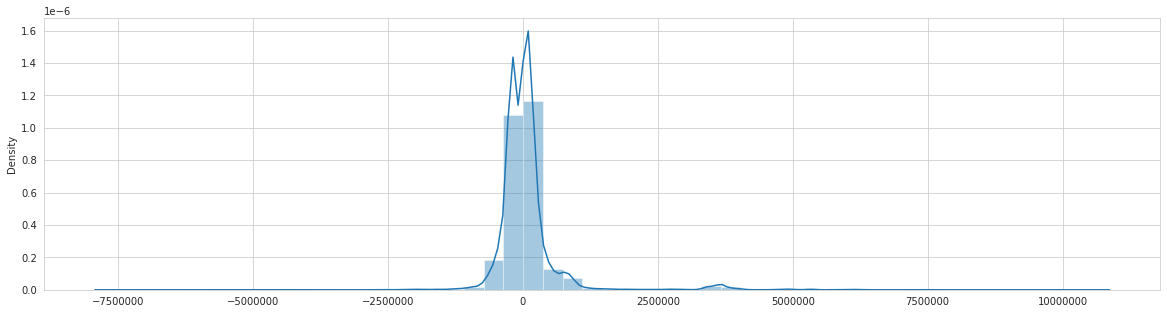

In [230]:
plt.subplots(figsize=(20,5))
sns.distplot(x=maindata['avg_delay'])
plt.ticklabel_format(style='plain', axis='x')
plt.show()

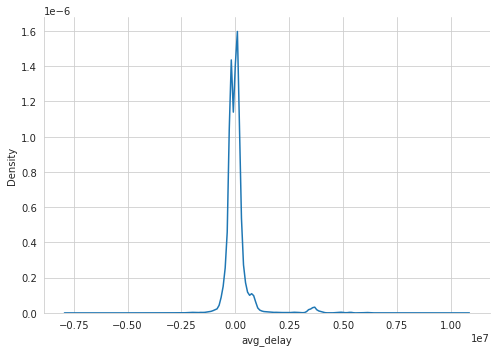

In [231]:
sns.displot(maindata['avg_delay'], kind="kde", aspect=1.4)

From the above distribution plots it can be inferred average delay is normalised around 0. Some have lesser delays than 0, meaning they have tendency to clear their dues beforehand, and some more than 0, meaning they generally delay their payment.

### You are expected to group the X_train dataset on 'name_customer' column with 'doc_id' in the x_train set

### Need to store the outcome into a new dataframe 

- Note code given for groupby statement- X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()

In [58]:
#creating a new dataframe called 'train' to store grouped values of 'name_customer' and 'doc_id' from X_train
train=pd.DataFrame()
train=X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()
train

,name_customer,doc_id
0,11078 us,1
1,17135 associates,1
2,236008 associates,1
3,99 CE,2
4,99 CE associates,1
5,99 CE corporation,2
6,99 CE foundation,2
7,99 CE in,1
8,99 CE llc,1
9,99 CE systems,5


### You can make another distribution plot of the "doc_id" column from x_train

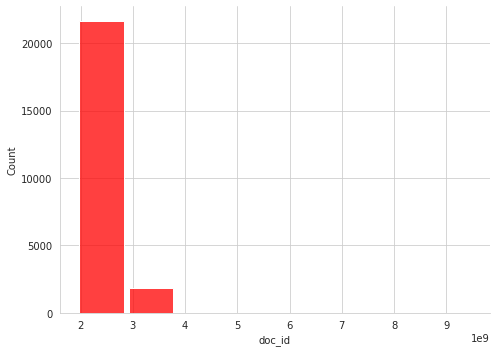

In [233]:
sns.displot(X_train['doc_id'], kde = False, color ='red', bins=8, shrink=0.9, aspect=1.4)

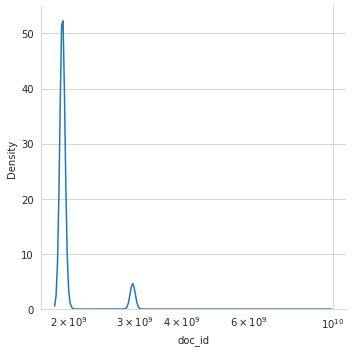

In [234]:
sns.displot(X_train['doc_id'], kind="kde", log_scale=10)

From the above distribution plots it can be inferred that most doc ids are of the value 2*(10)^9, and a few are of the value 3*(10)^9

#### Create a Distribution plot only for business_year and a seperate distribution plot of "business_year" column along with the doc_id" column


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


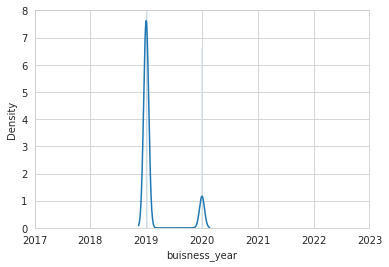

In [235]:
fig, ax = plt.subplots()
sns.distplot(X_train['buisness_year'], ax=ax)
ax.set_xlim(2017, 2023)
ax.set_ylim(0,8)
plt.show()


From above plot it can be inferred that most business year's are of 2019 value, and some are 2020.

([<matplotlib.axis.XTick at 0x7f4f87e28c10>,
 <a list of 4 Text major ticklabel objects>)

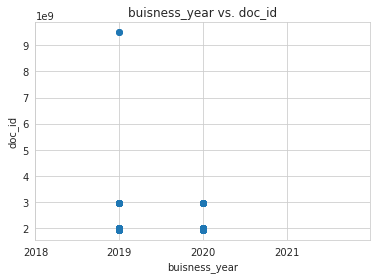

In [236]:
plt.scatter(X_train.buisness_year, X_train.doc_id)
plt.title('buisness_year vs. doc_id')
plt.xlabel('buisness_year')
plt.ylabel('doc_id')
plt.xlim(2018,2022)
plt.xticks(range(2018,2022))

Above is a scatter plot for business year vs doc id.

# Feature Engineering 

### Display and describe the X_train dataframe 

In [180]:
X_train

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,U001,200769623,WAL-MAR corp,2020,1930438491,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280000
1,U001,200980828,BEN E,2019,1929646410,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600000
2,U001,200792734,MDV/ trust,2019,1929873765,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860000
4,U001,200769623,WAL-MAR foundation,2019,1930147974,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290000
5,CA02,140106181,THE corporation,2019,2960581231,2019-09-20,2019-10-04,2019-09-24,CA10,15542.545455
6,U001,200769623,WAL-MAR in,2019,1930083373,2019-01-11,2019-11-16,2019-11-01,NAH4,7358.490000
8,U001,200769623,WAL-MAR corp,2019,1929439637,2019-07-06,2019-06-22,2019-06-07,NAH4,15995.040000
9,U001,200762301,C&S WH systems,2019,1928819386,2019-02-20,2019-03-07,2019-02-20,NAC6,28.630000
11,U001,200743129,BROOKS co,2019,1928550622,2019-02-01,2019-01-17,2019-01-02,NAA8,103147.370000
12,U001,200186937,SYSC corporation,2019,1929151655,2019-04-15,2019-04-30,2019-04-15,NAA8,16381.450000


In [181]:
X_train.describe()

,buisness_year,doc_id,converted_usd
count,23494.000000,2.349400e+04,23494.000000
mean,2019.132842,2.012017e+09,30759.477811
std,0.339412,2.853757e+08,36589.839942
min,2019.000000,1.928502e+09,2.400000
25%,2019.000000,1.929181e+09,4618.286713
50%,2019.000000,1.929733e+09,17027.670000
75%,2019.000000,1.930209e+09,45543.553444
max,2020.000000,9.500000e+09,668593.360000


#### The "business_code" column inside X_train, is a categorical column, so you need to perform Labelencoder on that particular column

- Note - call the Label Encoder from sklearn library and use the fit() function on "business_code" column
- Note - Please fill in the blanks (two) to complete this code

In [182]:
from sklearn.preprocessing import LabelEncoder
business_coder = LabelEncoder()
business_coder.fit(X_train['business_code'])

LabelEncoder()

#### You are expected to store the value into a new column i.e. "business_code_enc"

- Note - For Training set you are expected to use fit_trainsform()
- Note - For Test set you are expected to use the trainsform()
- Note - For Validation set you are expected to use the trainsform()


- Partial code is provided, please fill in the blanks 

In [183]:
X_train['business_code_enc'] = business_coder.fit_transform(X_train['business_code'])

C:\Users\Legion\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [184]:
X_val['business_code_enc'] = business_coder.fit_transform(X_val['business_code'])
X_test['business_code_enc'] = business_coder.fit_transform(X_test['business_code'])

C:\Users\Legion\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Legion\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Display "business_code" and "business_code_enc" together from X_train dataframe 

In [185]:
X_train['business_code_enc']

0        1
1        1
2        1
4        1
5        0
6        1
8        1
9        1
11       1
12       1
13       1
16       1
17       1
18       1
19       1
20       5
21       1
23       1
24       1
26       1
28       1
29       0
30       1
31       1
32       1
33       1
34       1
36       1
38       1
39       1
        ..
29628    0
29629    1
29630    1
29632    1
29635    1
29636    1
29637    1
29638    1
29639    1
29640    1
29641    1
29642    1
29643    1
29644    1
29645    1
29646    1
29647    1
29648    1
29649    1
29652    1
29653    1
29654    1
29656    1
29657    1
29658    1
29659    1
29662    1
29663    1
29664    1
29665    1
Name: business_code_enc, Length: 23494, dtype: int32

In [65]:
X_train['business_code']

0        U001
1        U001
2        U001
4        U001
5        CA02
6        U001
8        U001
9        U001
11       U001
12       U001
13       U001
16       U001
17       U001
18       U001
19       U001
20       U013
21       U001
23       U001
24       U001
26       U001
28       U001
29       CA02
30       U001
31       U001
32       U001
33       U001
34       U001
36       U001
38       U001
39       U001
         ... 
29628    CA02
29629    U001
29630    U001
29632    U001
29635    U001
29636    U001
29637    U001
29638    U001
29639    U001
29640    U001
29641    U001
29642    U001
29643    U001
29644    U001
29645    U001
29646    U001
29647    U001
29648    U001
29649    U001
29652    U001
29653    U001
29654    U001
29656    U001
29657    U001
29658    U001
29659    U001
29662    U001
29663    U001
29664    U001
29665    U001
Name: business_code, Length: 23494, dtype: object

#### Create a function called "custom" for dropping the columns 'business_code' from train, test and validation dataframe

- Note - Fill in the blank to complete the code

In [186]:
def delbc(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

### Call the function by passing the column name which needed to be dropped from train, test and validation dataframes. Return updated dataframes to be stored in X_train ,X_val, X_test  

- Note = Fill in the blank to complete the code 

In [187]:
X_train , X_val , X_test = delbc(['business_code'])

C:\Users\Legion\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


### Manually replacing str values with numbers, Here we are trying manually replace the customer numbers with some specific values like, 'CCCA' as 1, 'CCU' as 2 and so on. Also we are converting the datatype "cust_number" field to int type.

- We are doing it for all the three dataframes as shown below. This is fully completed code. No need to modify anything here 



In [188]:
X_train['cust_number'] = X_train['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_test['cust_number'] = X_test['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_val['cust_number'] = X_val['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)


C:\Users\Legion\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Legion\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Legion\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pand

#### It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]. Unknown will be added in fit and transform will take care of new item. It gives unknown class id.

#### This will fit the encoder for all the unique values and introduce unknown value

- Note - Keep this code as it is, we will be using this later on.  

In [189]:
#For encoding unseen labels
class EncoderExt(object):
    def __init__(self):
        self.label_encoder = LabelEncoder()
    def fit(self, data_list):
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        return self
    def transform(self, data_list):
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]
        return self.label_encoder.transform(new_data_list)

### Use the user define Label Encoder function called "EncoderExt" for the "name_customer" column

- Note - Keep the code as it is, no need to change

In [190]:
label_encoder = EncoderExt()
label_encoder.fit(X_train['name_customer'])
X_train['name_customer_enc']=label_encoder.transform(X_train['name_customer'])
X_val['name_customer_enc']=label_encoder.transform(X_val['name_customer'])
X_test['name_customer_enc']=label_encoder.transform(X_test['name_customer'])

C:\Users\Legion\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Legion\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Legion\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

### As we have created the a new column "name_customer_enc", so now drop "name_customer" column from all three dataframes

- Note - Keep the code as it is, no need to change

In [191]:
X_train ,X_val, X_test = delbc(['name_customer'])

### Using Label Encoder for the "cust_payment_terms" column

- Note - Keep the code as it is, no need to change

In [192]:
label_encoder1 = EncoderExt()
label_encoder1.fit(X_train['cust_payment_terms'])
X_train['cust_payment_terms_enc']=label_encoder1.transform(X_train['cust_payment_terms'])
X_val['cust_payment_terms_enc']=label_encoder1.transform(X_val['cust_payment_terms'])
X_test['cust_payment_terms_enc']=label_encoder1.transform(X_test['cust_payment_terms'])

C:\Users\Legion\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Legion\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Legion\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [193]:
X_train ,X_val, X_test = delbc(['cust_payment_terms'])

## Check the datatype of all the columns of Train, Test and Validation dataframes realted to X

- Note - You are expected yo use dtype

In [194]:
X_train.dtypes

cust_number                        int32
buisness_year                      int64
doc_id                             int64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int64
cust_payment_terms_enc             int64
dtype: object

In [195]:
X_test.dtypes

cust_number                        int32
buisness_year                      int64
doc_id                             int64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int64
cust_payment_terms_enc             int64
dtype: object

In [196]:
X_val.dtypes

cust_number                        int32
buisness_year                      int64
doc_id                             int64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int64
cust_payment_terms_enc             int64
dtype: object

### From the above output you can notice their are multiple date columns with datetime format

### In order to pass it into our model, we need to convert it into float format

### You need to extract day, month and year from the "posting_date" column 

1.   Extract days from "posting_date" column and store it into a new column "day_of_postingdate" for train, test and validation dataset 
2.   Extract months from "posting_date" column and store it into a new column "month_of_postingdate" for train, test and validation dataset
3.   Extract year from "posting_date" column and store it into a new column "year_of_postingdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year






In [197]:
X_train['day_of_postingdate'] = X_train['posting_date'].dt.day
X_train['month_of_postingdate'] = X_train['posting_date'].dt.month
X_train['year_of_postingdate'] = X_train['posting_date'].dt.year

X_val['day_of_postingdate'] = X_val['posting_date'].dt.day
X_val['month_of_postingdate'] = X_val['posting_date'].dt.month
X_val['year_of_postingdate'] = X_val['posting_date'].dt.year


X_test['day_of_postingdate'] = X_test['posting_date'].dt.day
X_test['month_of_postingdate'] = X_test['posting_date'].dt.month
X_test['year_of_postingdate'] = X_test['posting_date'].dt.year



C:\Users\Legion\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Legion\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Legion\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pand

### pass the "posting_date" column into the Custom function for train, test and validation dataset

In [198]:
X_train ,X_val, X_test = delbc(['posting_date'])

### You need to extract day, month and year from the "baseline_create_date" column 

1.   Extract days from "baseline_create_date" column and store it into a new column "day_of_createdate" for train, test and validation dataset 
2.   Extract months from "baseline_create_date" column and store it into a new column "month_of_createdate" for train, test and validation dataset
3.   Extract year from "baseline_create_date" column and store it into a new column "year_of_createdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year


- Note - Do as it is been shown in the previous two code boxes

### Extracting Day, Month, Year for 'baseline_create_date' column

In [199]:
X_train['day_of_baselinecreatedate'] = X_train['baseline_create_date'].dt.day
X_train['month_of_baselinecreatedate'] = X_train['baseline_create_date'].dt.month
X_train['year_of_baselinecreatedate'] = X_train['baseline_create_date'].dt.year

X_val['day_of_baselinecreatedate'] = X_val['baseline_create_date'].dt.day
X_val['month_of_baselinecreatedate'] = X_val['baseline_create_date'].dt.month
X_val['year_of_baselinecreatedate'] = X_val['baseline_create_date'].dt.year


X_test['day_of_baselinecreatedate'] = X_test['baseline_create_date'].dt.day
X_test['month_of_baselinecreatedate'] = X_test['baseline_create_date'].dt.month
X_test['year_of_baselinecreatedate'] = X_test['baseline_create_date'].dt.year

C:\Users\Legion\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Legion\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Legion\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pand

### pass the "baseline_create_date" column into the Custom function for train, test and validation dataset

In [200]:
X_train ,X_val, X_test = delbc(['baseline_create_date'])

### You need to extract day, month and year from the "due_in_date" column 

1.   Extract days from "due_in_date" column and store it into a new column "day_of_due" for train, test and validation dataset 
2.   Extract months from "due_in_date" column and store it into a new column "month_of_due" for train, test and validation dataset
3.   Extract year from "due_in_date" column and store it into a new column "year_of_due" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year

- Note - Do as it is been shown in the previous code

In [201]:
X_train['day_of_dueindate'] = X_train['due_in_date'].dt.day
X_train['month_of_dueindate'] = X_train['due_in_date'].dt.month
X_train['year_of_dueindate'] = X_train['due_in_date'].dt.year

X_val['day_of_dueindate'] = X_val['due_in_date'].dt.day
X_val['month_of_dueindate'] = X_val['due_in_date'].dt.month
X_val['year_of_dueindate'] = X_val['due_in_date'].dt.year


X_test['day_of_dueindate'] = X_test['due_in_date'].dt.day
X_test['month_of_dueindate'] = X_test['due_in_date'].dt.month
X_test['year_of_dueindate'] = X_test['due_in_date'].dt.year

C:\Users\Legion\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Legion\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Legion\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pand

pass the "due_in_date" column into the Custom function for train, test and validation dataset

In [202]:
X_train ,X_val, X_test = delbc(['due_in_date'])

### Check for the datatypes for train, test and validation set again

- Note - all the data type should be in either int64 or float64 format 


In [203]:
X_train.dtypes

cust_number                      int32
buisness_year                    int64
doc_id                           int64
converted_usd                  float64
business_code_enc                int32
name_customer_enc                int64
cust_payment_terms_enc           int64
day_of_postingdate               int64
month_of_postingdate             int64
year_of_postingdate              int64
day_of_baselinecreatedate        int64
month_of_baselinecreatedate      int64
year_of_baselinecreatedate       int64
day_of_dueindate                 int64
month_of_dueindate               int64
year_of_dueindate                int64
dtype: object

In [204]:
X_test.dtypes

cust_number                      int32
buisness_year                    int64
doc_id                           int64
converted_usd                  float64
business_code_enc                int32
name_customer_enc                int64
cust_payment_terms_enc           int64
day_of_postingdate               int64
month_of_postingdate             int64
year_of_postingdate              int64
day_of_baselinecreatedate        int64
month_of_baselinecreatedate      int64
year_of_baselinecreatedate       int64
day_of_dueindate                 int64
month_of_dueindate               int64
year_of_dueindate                int64
dtype: object

In [205]:
X_val.dtypes

cust_number                      int32
buisness_year                    int64
doc_id                           int64
converted_usd                  float64
business_code_enc                int32
name_customer_enc                int64
cust_payment_terms_enc           int64
day_of_postingdate               int64
month_of_postingdate             int64
year_of_postingdate              int64
day_of_baselinecreatedate        int64
month_of_baselinecreatedate      int64
year_of_baselinecreatedate       int64
day_of_dueindate                 int64
month_of_dueindate               int64
year_of_dueindate                int64
dtype: object

# Feature Selection

### Filter Method

- Calling the VarianceThreshold Function 
- Note - Keep the code as it is, no need to change 

In [206]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)
len(X_train.columns[constant_filter.get_support()])

16

- Note - Keep the code as it is, no need to change 


In [207]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[constant_filter.get_support()]]
print(len(constant_columns))

0


- transpose the feature matrice
- print the number of duplicated features
- select the duplicated features columns names

- Note - Keep the code as it is, no need to change 


In [208]:
x_train_T = X_train.T
print(x_train_T.duplicated().sum())
duplicated_columns = x_train_T[x_train_T.duplicated()].index.values

0


### Filtering depending upon correlation matrix value
- We have created a function called handling correlation which is going to return fields based on the correlation matrix value with a threshold of 0.8

- Note - Keep the code as it is, no need to change 

In [209]:
def handling_correlation(X_train,threshold=0.8):
    corr_features = set()
    corr_matrix = X_train.corr()
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

- Note : Here we are trying to find out the relevant fields, from X_train
- Please fill in the blanks to call handling_correlation() function with a threshold value of 0.85

In [210]:
train=X_train.copy()
handling_correlation(train.copy(),threshold=0.85)

['month_of_dueindate',
 'year_of_baselinecreatedate',
 'day_of_baselinecreatedate',
 'year_of_dueindate',
 'year_of_postingdate']

### Heatmap for X_train

- Note - Keep the code as it is, no need to change

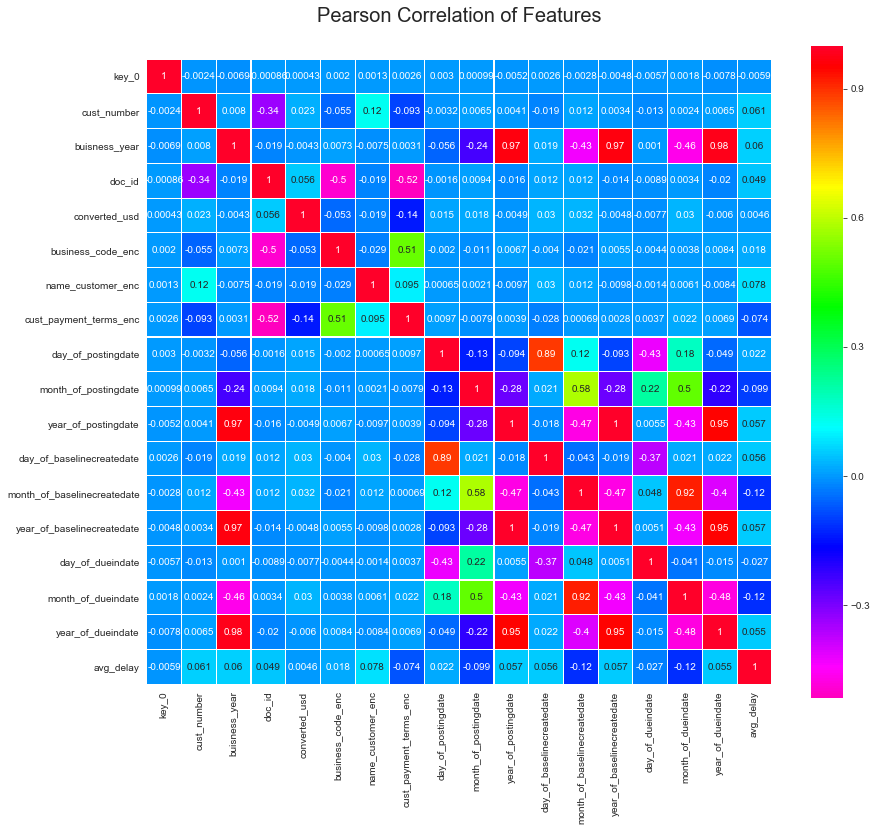

In [211]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap='gist_rainbow_r', linecolor='white', annot=True)

#### Calling variance threshold for threshold value = 0.8

- Note -  Fill in the blanks to call the appropriate method

In [212]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.8)
sel.fit(X_train)
len(X_train.columns[sel.get_support()])

11

In [213]:
sel.variances_

array([1.79867713e+15, 1.15195317e-01, 8.14358365e+16, 1.33875940e+09,
       2.89199371e-01, 1.06851239e+06, 1.17330626e+02, 8.15549689e+01,
       1.18936898e+01, 1.15661120e-01, 7.71513423e+01, 1.22576245e+01,
       1.15788866e-01, 7.61732267e+01, 1.20393869e+01, 1.18619907e-01])

### Important features columns are 
- 'year_of_createdate' 
- 'year_of_due'
- 'day_of_createdate'
- 'year_of_postingdate'
- 'month_of_due'
- 'month_of_createdate'

# Modelling 

#### Now you need to compare with different machine learning models, and needs to find out the best predicted model

- Linear Regression
- Decision Tree Regression
- Random Forest Regression
- Support Vector Regression
- Extreme Gradient Boost Regression 

### You need to make different blank list for different evaluation matrix 

- MSE
- R2
- Algorithm

In [214]:
MSE_Score = []
R2_Score = []
Algorithm = []
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### You need to start with the baseline model Linear Regression

- Step 1 : Call the Linear Regression from sklearn library
- Step 2 : make an object of Linear Regression 
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [215]:
from sklearn.linear_model import LinearRegression
Algorithm.append('LinearRegression')
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [216]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [217]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test)

6009343872145.284

### Display The Comparison Lists

In [218]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression'],[5687395354090.674],[0.045606356167239515],

### You need to start with the baseline model Support Vector Regression

- Step 1 : Call the Support Vector Regressor from sklearn library
- Step 2 : make an object of SVR
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [219]:
from sklearn.svm import SVR
Algorithm.append('Support Vector Regression')
regressor = SVR()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

C:\Users\Legion\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Legion\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Check for the 

- Mean Square Error
- R Square Error 

for "y_test" and "predicted" dataset and store those data inside respective list for comparison 

In [220]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [221]:
MSE_Score.append(mean_squared_error(y_val, predicted))
R2_Score.append(r2_score(y_val, predicted))

### Display The Comparison Lists

In [222]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regression'],[5687395354090.674, 5980335845264.572, 6245805393469.165],[0.045606356167239515, -0.0035515668170533754, -0.0015509444916361748],

### Your next model would be Decision Tree Regression

- Step 1 : Call the Decision Tree Regressor from sklearn library
- Step 2 : make an object of Decision Tree
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [223]:
from sklearn.tree import DecisionTreeRegressor
Algorithm.append('DecisionTreeRegression')
reg = DecisionTreeRegressor()
reg.fit(X_train, y_train)

predicted = reg.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [224]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [225]:
MSE_Score.append(mean_squared_error(y_val, predicted))
R2_Score.append(r2_score(y_val, predicted))

### Display The Comparison Lists

In [226]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regression', 'DecisionTreeRegression'],[5687395354090.674, 5980335845264.572, 6245805393469.165, 10084172150106.332, 13851578024427.404],[0.045606356167239515, -0.0035515668170533754, -0.0015509444916361748, -0.6922104415432531, -1.2211804849973427],

### Your next model would be Random Forest Regression

- Step 1 : Call the Random Forest Regressor from sklearn library
- Step 2 : make an object of Random Forest
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [227]:
from sklearn.ensemble import RandomForestRegressor
Algorithm.append('RandomForestRegression')
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

predicted=rf.predict(X_test)

C:\Users\Legion\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Legion\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [228]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [229]:
MSE_Score.append(mean_squared_error(y_val, predicted))
R2_Score.append(r2_score(y_val, predicted))

### Display The Comparison Lists


In [230]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regression', 'DecisionTreeRegression', 'RandomForestRegression'],[5687395354090.674, 5980335845264.572, 6245805393469.165, 10084172150106.332, 13851578024427.404, 5383867855750.228, 9182823179188.451],[0.045606356167239515, -0.0035515668170533754, -0.0015509444916361748, -0.6922104415432531, -1.2211804849973427, 0.0965408696148099, -0.4725186983623697],

In [ ]:
### The last but not the least model would be XGBoost or Extreme Gradient Boost Regression

- Step 1 : Call the XGBoost Regressor from xgb library
- Step 2 : make an object of Xgboost
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose### Extreme Gradient Boost Regression
- Note -  No need to change the code 

In [231]:
import xgboost as xgb
Algorithm.append('XGB Regressor')
regressor = xgb.XGBRegressor()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [232]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [233]:
MSE_Score.append(mean_squared_error(y_val, predicted))
R2_Score.append(r2_score(y_val, predicted))

### Display The Comparison Lists


In [234]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regression', 'DecisionTreeRegression', 'RandomForestRegression', 'XGB Regressor'],[5687395354090.674, 5980335845264.572, 6245805393469.165, 10084172150106.332, 13851578024427.404, 5383867855750.228, 9182823179188.451, 4735892220379.289, 8085916367373.036],[0.045606356167239515, -0.0035515668170533754, -0.0015509444916361748, -0.6922104415432531, -1.2211804849973427, 0.0965408696148099, -0.4725186983623697, 0.20527673010175762, -0.2966233599418382],

## You need to make the comparison list into a comparison dataframe 

In [235]:
Comparison = pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score)), columns = ['Algorithm', 'MSE_Score', 'R2_Score'])
Comparison

,Algorithm,MSE_Score,R2_Score
0,LinearRegression,5.687395e+12,0.045606
1,Support Vector Regression,5.980336e+12,-0.003552
2,DecisionTreeRegression,6.245805e+12,-0.001551
3,RandomForestRegression,1.008417e+13,-0.692210
4,XGB Regressor,1.385158e+13,-1.221180


## Now from the Comparison table, you need to choose the best fit model

- Step 1 - Fit X_train and y_train inside the model 
- Step 2 - Predict the X_test dataset
- Step 3 - Predict the X_val dataset


- Note - No need to change the code

In [236]:
regressorfinal = RandomForestRegressor()
regressorfinal.fit(X_train, y_train)
predictedfinal = regressorfinal.predict(X_test)
predict_testfinal = regressorfinal.predict(X_val)

C:\Users\Legion\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Legion\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


### Calculate the Mean Square Error for test dataset

- Note - No need to change the code

In [237]:
mean_squared_error(y_test,predictedfinal)

5163030871688.67

### Calculate the mean Square Error for validation dataset

In [238]:
mean_squared_error(y_val,predict_testfinal)

5576507425625.485

### Calculate the R2 score for test

In [239]:
y_pred=predictedfinal

In [240]:
r2=r2_score(y_test,y_pred)
r2

0.13359920665479674

### Calculate the R2 score for Validation

In [241]:
r2_score(y_val,predict_testfinal)

0.10577484771781964

### Calculate the Accuracy for train Dataset 

In [242]:
regressorfinal.score(X_train, y_train)

0.8558586479621306

### Calculate the accuracy for validation

In [243]:
regressorfinal.score(X_val, y_val)

0.10577484771781964

### Calculate the accuracy for test

In [244]:
regressorfinal.score(X_test, y_test)

0.13359920665479674

## Specify the reason behind choosing your machine learning model 

I have chosen the Random Forest Regressor model as from the comparison table it can be seen it has lowest MSE Score and highest R Square Error, which are the ideal conditions for choosing a model.

## Now you need to pass the Nulldata dataframe into this machine learning model

#### In order to pass this Nulldata dataframe into the ML model, we need to perform the following

- Step 1 : Label Encoding 
- Step 2 : Day, Month and Year extraction 
- Step 3 : Change all the column data type into int64 or float64
- Step 4 : Need to drop the useless columns 

### Display the Nulldata 

In [245]:
nulldata

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,140105686,SYSC llc,NaT,2020,2960623488,2020-03-30,2020-04-10,2020-03-31,CA10,2307.482517
7,U001,200744019,TARG us,NaT,2020,1930659387,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.020000
10,U001,200418007,AM,NaT,2020,1930610806,2020-11-03,2020-03-26,2020-03-11,NAA8,3525.590000
14,U001,200739534,OK systems,NaT,2020,1930788296,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.650000
15,U001,200353024,DECA corporation,NaT,2020,1930817482,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.060000
22,U001,200744019,TARG associates,NaT,2020,1930676042,2020-03-21,2020-04-05,2020-03-21,NAA8,5893.010000
25,CA02,140106408,WAL-M corp,NaT,2020,2960618790,2020-06-03,2020-03-16,2020-03-06,CA10,64917.671329
27,U001,200337148,COAS llc,NaT,2020,1930592246,2020-02-03,2020-03-17,2020-03-02,NAA8,11380.830000
35,U001,200794332,COST associates,NaT,2020,1930731070,2020-07-04,2020-04-22,2020-04-07,NAAX,3863.930000
37,U001,200794332,COST llc,NaT,2020,1930803605,2020-04-23,2020-05-08,2020-04-23,NAAX,74453.010000


### Check for the number of rows and columns in the nulldata

In [246]:
nulldata.shape

(9779, 11)

### Check the Description and Information of the nulldata 

In [247]:
nulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9779 entries, 3 to 50098
Data columns (total 11 columns):
business_code           9779 non-null object
cust_number             9779 non-null object
name_customer           9779 non-null object
clear_date              0 non-null datetime64[ns]
buisness_year           9779 non-null int64
doc_id                  9779 non-null int64
posting_date            9779 non-null datetime64[ns]
due_in_date             9779 non-null datetime64[ns]
baseline_create_date    9779 non-null datetime64[ns]
cust_payment_terms      9779 non-null object
converted_usd           9779 non-null float64
dtypes: datetime64[ns](4), float64(1), int64(2), object(4)
memory usage: 916.8+ KB


In [248]:
nulldata.describe()

,buisness_year,doc_id,converted_usd
count,9779.0,9.779000e+03,9779.000000
mean,2020.0,2.015730e+09,32391.887468
std,0.0,2.824983e+08,35389.047453
min,2020.0,1.930535e+09,0.720000
25%,2020.0,1.930660e+09,5731.950000
50%,2020.0,1.930732e+09,19403.930000
75%,2020.0,1.930821e+09,48806.640000
max,2020.0,2.960636e+09,653644.800000


### Storing the Nulldata into a different dataset 
# for BACKUP

In [249]:
nulldata1=pd.DataFrame(nulldata)

### Call the Label Encoder for Nulldata

- Note - you are expected to fit "business_code" as it is a categorical variable
- Note - No need to change the code

In [250]:
from sklearn.preprocessing import LabelEncoder
business_codern = LabelEncoder()
business_codern.fit(nulldata['business_code'])
nulldata['business_code_enc'] = business_codern.transform(nulldata['business_code'])

C:\Users\Legion\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


### Now you need to manually replacing str values with numbers
- Note - No need to change the code

In [251]:
nulldata['cust_number'] = nulldata['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)

C:\Users\Legion\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## You need to extract day, month and year from the "clear_date", "posting_date", "due_in_date", "baseline_create_date" columns


##### 1.   Extract day from "clear_date" column and store it into 'day_of_cleardate'
##### 2.   Extract month from "clear_date" column and store it into 'month_of_cleardate'
##### 3.   Extract year from "clear_date" column and store it into 'year_of_cleardate'



##### 4.   Extract day from "posting_date" column and store it into 'day_of_postingdate'
##### 5.   Extract month from "posting_date" column and store it into 'month_of_postingdate'
##### 6.   Extract year from "posting_date" column and store it into 'year_of_postingdate'




##### 7.   Extract day from "due_in_date" column and store it into 'day_of_due'
##### 8.   Extract month from "due_in_date" column and store it into 'month_of_due'
##### 9.   Extract year from "due_in_date" column and store it into 'year_of_due'




##### 10.   Extract day from "baseline_create_date" column and store it into 'day_of_createdate'
##### 11.   Extract month from "baseline_create_date" column and store it into 'month_of_createdate'
##### 12.   Extract year from "baseline_create_date" column and store it into 'year_of_createdate'




- Note - You are supposed To use - 

*   dt.day
*   dt.month
*   dt.year

In [252]:
nulldata['day_of_cleardate'] = nulldata['clear_date'].dt.day
nulldata['month_of_cleardate'] = nulldata['clear_date'].dt.month
nulldata['year_of_cleardate'] = nulldata['clear_date'].dt.year

C:\Users\Legion\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Legion\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Legion\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pand

In [253]:
nulldata['day_of_postingdate'] = nulldata['posting_date'].dt.day
nulldata['month_of_postingdate'] = nulldata['posting_date'].dt.month
nulldata['year_of_postingdate'] = nulldata['posting_date'].dt.year

C:\Users\Legion\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Legion\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Legion\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pand

In [254]:
nulldata['day_of_dueindate'] = nulldata['due_in_date'].dt.day
nulldata['month_of_dueindate'] = nulldata['due_in_date'].dt.month
nulldata['year_of_dueindate'] = nulldata['due_in_date'].dt.year

C:\Users\Legion\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Legion\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Legion\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pand

In [255]:
nulldata['day_of_baselinecreatedate'] = nulldata['baseline_create_date'].dt.day
nulldata['month_of_baselinecreatedate'] = nulldata['baseline_create_date'].dt.month
nulldata['year_of_baselinecreatedate'] = nulldata['baseline_create_date'].dt.year

C:\Users\Legion\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Legion\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Legion\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pand

### Use Label Encoder1 of all the following columns - 
- 'cust_payment_terms' and store into 'cust_payment_terms_enc'
- 'business_code' and store into 'business_code_enc'
- 'name_customer' and store into 'name_customer_enc'

Note - No need to change the code

In [256]:
nulldata['cust_payment_terms_enc']=label_encoder1.transform(nulldata['cust_payment_terms'])
nulldata['business_code_enc']=label_encoder1.transform(nulldata['business_code'])
nulldata['name_customer_enc']=label_encoder.transform(nulldata['name_customer'])


C:\Users\Legion\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Legion\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Legion\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pand

### Check for the datatypes of all the columns of Nulldata

In [257]:
nulldata.dtypes

business_code                          object
cust_number                             int32
name_customer                          object
clear_date                     datetime64[ns]
buisness_year                           int64
doc_id                                  int64
posting_date                   datetime64[ns]
due_in_date                    datetime64[ns]
baseline_create_date           datetime64[ns]
cust_payment_terms                     object
converted_usd                         float64
business_code_enc                       int64
day_of_cleardate                      float64
month_of_cleardate                    float64
year_of_cleardate                     float64
day_of_postingdate                      int64
month_of_postingdate                    int64
year_of_postingdate                     int64
day_of_dueindate                        int64
month_of_dueindate                      int64
year_of_dueindate                       int64
day_of_baselinecreatedate         

### Now you need to drop all the unnecessary columns - 

- 'business_code'
- "baseline_create_date"
- "due_in_date"
- "posting_date"
- "name_customer"
- "clear_date"
- "cust_payment_terms"
- 'day_of_cleardate'
- "month_of_cleardate"
- "year_of_cleardate"

In [258]:
nulldata=nulldata.drop(['business_code',"baseline_create_date","due_in_date","posting_date","name_customer","clear_date","cust_payment_terms",'day_of_cleardate',"month_of_cleardate","year_of_cleardate"], axis=1)

In [259]:
nulldata

,cust_number,buisness_year,doc_id,converted_usd,business_code_enc,day_of_postingdate,month_of_postingdate,year_of_postingdate,day_of_dueindate,month_of_dueindate,year_of_dueindate,day_of_baselinecreatedate,month_of_baselinecreatedate,year_of_baselinecreatedate,cust_payment_terms_enc,name_customer_enc
3,140105686,2020,2960623488,2307.482517,64,30,3,2020,10,4,2020,31,3,2020,5,2712
7,200744019,2020,1930659387,11173.020000,64,19,3,2020,3,4,2020,19,3,2020,20,2795
10,200418007,2020,1930610806,3525.590000,64,3,11,2020,26,3,2020,11,3,2020,20,93
14,200739534,2020,1930788296,121105.650000,64,15,4,2020,30,4,2020,15,4,2020,20,2021
15,200353024,2020,1930817482,3726.060000,64,23,4,2020,26,4,2020,16,4,2020,34,722
22,200744019,2020,1930676042,5893.010000,64,21,3,2020,5,4,2020,21,3,2020,20,2786
25,140106408,2020,2960618790,64917.671329,64,3,6,2020,16,3,2020,6,3,2020,5,2973
27,200337148,2020,1930592246,11380.830000,64,3,2,2020,17,3,2020,2,3,2020,20,561
35,200794332,2020,1930731070,3863.930000,64,4,7,2020,22,4,2020,7,4,2020,22,619
37,200794332,2020,1930803605,74453.010000,64,23,4,2020,8,5,2020,23,4,2020,22,625


### Check the information of the "nulldata" dataframe

In [260]:
nulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9779 entries, 3 to 50098
Data columns (total 16 columns):
cust_number                    9779 non-null int32
buisness_year                  9779 non-null int64
doc_id                         9779 non-null int64
converted_usd                  9779 non-null float64
business_code_enc              9779 non-null int64
day_of_postingdate             9779 non-null int64
month_of_postingdate           9779 non-null int64
year_of_postingdate            9779 non-null int64
day_of_dueindate               9779 non-null int64
month_of_dueindate             9779 non-null int64
year_of_dueindate              9779 non-null int64
day_of_baselinecreatedate      9779 non-null int64
month_of_baselinecreatedate    9779 non-null int64
year_of_baselinecreatedate     9779 non-null int64
cust_payment_terms_enc         9779 non-null int64
name_customer_enc              9779 non-null int64
dtypes: float64(1), int32(1), int64(14)
memory usage: 1.2 MB


### Compare "nulldata" with the "X_test" dataframe 

- use info() method

In [261]:
nulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9779 entries, 3 to 50098
Data columns (total 16 columns):
cust_number                    9779 non-null int32
buisness_year                  9779 non-null int64
doc_id                         9779 non-null int64
converted_usd                  9779 non-null float64
business_code_enc              9779 non-null int64
day_of_postingdate             9779 non-null int64
month_of_postingdate           9779 non-null int64
year_of_postingdate            9779 non-null int64
day_of_dueindate               9779 non-null int64
month_of_dueindate             9779 non-null int64
year_of_dueindate              9779 non-null int64
day_of_baselinecreatedate      9779 non-null int64
month_of_baselinecreatedate    9779 non-null int64
year_of_baselinecreatedate     9779 non-null int64
cust_payment_terms_enc         9779 non-null int64
name_customer_enc              9779 non-null int64
dtypes: float64(1), int32(1), int64(14)
memory usage: 1.2 MB


In [262]:
 X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7832 entries, 39759 to 49999
Data columns (total 16 columns):
cust_number                    7832 non-null int32
buisness_year                  7832 non-null int64
doc_id                         7832 non-null int64
converted_usd                  7832 non-null float64
business_code_enc              7832 non-null int32
name_customer_enc              7832 non-null int64
cust_payment_terms_enc         7832 non-null int64
day_of_postingdate             7832 non-null int64
month_of_postingdate           7832 non-null int64
year_of_postingdate            7832 non-null int64
day_of_baselinecreatedate      7832 non-null int64
month_of_baselinecreatedate    7832 non-null int64
year_of_baselinecreatedate     7832 non-null int64
day_of_dueindate               7832 non-null int64
month_of_dueindate             7832 non-null int64
year_of_dueindate              7832 non-null int64
dtypes: float64(1), int32(2), int64(13)
memory usage: 979.0 KB


### You must have noticed that there is a mismatch in the column sequence while compairing the dataframes

- Note - In order to fed into the machine learning model, you need to edit the sequence of "nulldata", similar to the "X_test" dataframe

- Display all the columns of the X_test dataframe 
- Display all the columns of the Nulldata dataframe 
- Store the Nulldata with new sequence into a new dataframe 


- Note - The code is given below, no need to change 

In [263]:
X_test.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_baselinecreatedate', 'month_of_baselinecreatedate',
       'year_of_baselinecreatedate', 'day_of_dueindate', 'month_of_dueindate',
       'year_of_dueindate'],
      dtype='object')

In [264]:
nulldata.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'day_of_postingdate', 'month_of_postingdate',
       'year_of_postingdate', 'day_of_dueindate', 'month_of_dueindate',
       'year_of_dueindate', 'day_of_baselinecreatedate',
       'month_of_baselinecreatedate', 'year_of_baselinecreatedate',
       'cust_payment_terms_enc', 'name_customer_enc'],
      dtype='object')

In [265]:
nulldata2=nulldata[['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_baselinecreatedate', 'month_of_baselinecreatedate', 'year_of_baselinecreatedate',
       'day_of_dueindate', 'month_of_dueindate', 'year_of_dueindate']]

### Display the Final Dataset

In [266]:
nulldata2

,cust_number,buisness_year,doc_id,converted_usd,business_code_enc,name_customer_enc,cust_payment_terms_enc,day_of_postingdate,month_of_postingdate,year_of_postingdate,day_of_baselinecreatedate,month_of_baselinecreatedate,year_of_baselinecreatedate,day_of_dueindate,month_of_dueindate,year_of_dueindate
3,140105686,2020,2960623488,2307.482517,64,2712,5,30,3,2020,31,3,2020,10,4,2020
7,200744019,2020,1930659387,11173.020000,64,2795,20,19,3,2020,19,3,2020,3,4,2020
10,200418007,2020,1930610806,3525.590000,64,93,20,3,11,2020,11,3,2020,26,3,2020
14,200739534,2020,1930788296,121105.650000,64,2021,20,15,4,2020,15,4,2020,30,4,2020
15,200353024,2020,1930817482,3726.060000,64,722,34,23,4,2020,16,4,2020,26,4,2020
22,200744019,2020,1930676042,5893.010000,64,2786,20,21,3,2020,21,3,2020,5,4,2020
25,140106408,2020,2960618790,64917.671329,64,2973,5,3,6,2020,6,3,2020,16,3,2020
27,200337148,2020,1930592246,11380.830000,64,561,20,3,2,2020,2,3,2020,17,3,2020
35,200794332,2020,1930731070,3863.930000,64,619,22,4,7,2020,7,4,2020,22,4,2020
37,200794332,2020,1930803605,74453.010000,64,625,22,23,4,2020,23,4,2020,8,5,2020


### Now you can pass this dataset into you final model and store it into "final_result"

In [267]:
final_result=regressorfinal.predict(nulldata2)

### you need to make the final_result as dataframe, with a column name "avg_delay"

- Note - No need to change the code

In [268]:
final_result = pd.Series(final_result,name='avg_delay')

### Display the "avg_delay" column

In [269]:
final_result

0      -4.153012e+05
1       4.953119e+05
2       4.646704e+05
3      -4.359258e+05
4      -3.196800e+06
5       1.082687e+06
6       9.039086e+05
7       3.109824e+06
8       1.684739e+06
9       2.413535e+06
10     -7.757217e+05
11      7.976035e+05
12     -2.086244e+06
13      4.420098e+05
14      1.245402e+06
15      5.575692e+05
16      4.005572e+05
17      2.002436e+06
18      1.000012e+06
19      4.164979e+05
20     -1.326041e+06
21     -2.104094e+05
22     -2.104094e+05
23      7.063275e+05
24      8.135777e+05
25      3.834881e+05
26     -1.807285e+05
27      9.405426e+05
28      1.918080e+06
29     -4.184857e+06
            ...     
9749    9.039086e+05
9750    9.039086e+05
9751    9.039086e+05
9752    9.039086e+05
9753    9.039086e+05
9754    9.039086e+05
9755    9.039086e+05
9756    9.039086e+05
9757    9.039086e+05
9758    9.039086e+05
9759    9.039086e+05
9760    9.039086e+05
9761    9.039086e+05
9762    9.039086e+05
9763    9.039086e+05
9764    9.039086e+05
9765    9.039

### Now you need to merge this final_result dataframe with the BACKUP of "nulldata" Dataframe which we have created in earlier steps

In [270]:
nulldata1.reset_index(drop=True,inplace=True)
Final = nulldata1.merge(final_result , on = nulldata.index )

### Display the "Final" dataframe 

In [271]:
Final

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,...,year_of_postingdate,day_of_dueindate,month_of_dueindate,year_of_dueindate,day_of_baselinecreatedate,month_of_baselinecreatedate,year_of_baselinecreatedate,cust_payment_terms_enc,name_customer_enc,avg_delay
0,3,CA02,140105686,SYSC llc,NaT,2020,2960623488,2020-03-30,2020-04-10,2020-03-31,...,2020,10,4,2020,31,3,2020,5,2712,-4.153012e+05
1,7,U001,200744019,TARG us,NaT,2020,1930659387,2020-03-19,2020-04-03,2020-03-19,...,2020,3,4,2020,19,3,2020,20,2795,4.953119e+05
2,10,U001,200418007,AM,NaT,2020,1930610806,2020-11-03,2020-03-26,2020-03-11,...,2020,26,3,2020,11,3,2020,20,93,4.646704e+05
3,14,U001,200739534,OK systems,NaT,2020,1930788296,2020-04-15,2020-04-30,2020-04-15,...,2020,30,4,2020,15,4,2020,20,2021,-4.359258e+05
4,15,U001,200353024,DECA corporation,NaT,2020,1930817482,2020-04-23,2020-04-26,2020-04-16,...,2020,26,4,2020,16,4,2020,34,722,-3.196800e+06
5,22,U001,200744019,TARG associates,NaT,2020,1930676042,2020-03-21,2020-04-05,2020-03-21,...,2020,5,4,2020,21,3,2020,20,2786,1.082687e+06
6,25,CA02,140106408,WAL-M corp,NaT,2020,2960618790,2020-06-03,2020-03-16,2020-03-06,...,2020,16,3,2020,6,3,2020,5,2973,9.039086e+05
7,27,U001,200337148,COAS llc,NaT,2020,1930592246,2020-02-03,2020-03-17,2020-03-02,...,2020,17,3,2020,2,3,2020,20,561,3.109824e+06
8,35,U001,200794332,COST associates,NaT,2020,1930731070,2020-07-04,2020-04-22,2020-04-07,...,2020,22,4,2020,7,4,2020,22,619,1.684739e+06
9,37,U001,200794332,COST llc,NaT,2020,1930803605,2020-04-23,2020-05-08,2020-04-23,...,2020,8,5,2020,23,4,2020,22,625,2.413535e+06


### Check for the Number of Rows and Columns in your "Final" dataframe 

In [272]:
rows = len(Final.axes[0])
cols = len(Final.axes[1])
print('Number of Rows:', rows)
print('Number of Columns:', cols)

Number of Rows: 9779
Number of Columns: 28


### Now, you need to do convert the below fields back into date and time format 

- Convert "due_in_date" into datetime format
- Convert "avg_delay" into datetime format
- Create a new column "clear_date" and store the sum of "due_in_date" and "avg_delay"
- display the new "clear_date" column
- Note - Code is given below, no need to change 

In [273]:
Final['clear_date'] = pd.to_datetime(Final['due_in_date']) + pd.to_timedelta(Final['avg_delay'], unit='s')

### Display the "clear_date" column

In [274]:
Final['clear_date']

0      2020-04-05 04:38:18.806434873
1      2020-04-08 17:35:11.894793075
2      2020-03-31 09:04:30.360402934
3      2020-04-24 22:54:34.190262568
4      2020-03-20 00:00:00.000000000
5      2020-04-17 12:44:46.714313028
6      2020-03-26 11:05:08.571428572
7      2020-04-21 23:50:24.000000000
8      2020-05-11 11:58:59.131115458
9      2020-06-04 22:25:34.509316770
10     2020-03-30 00:31:18.260869566
11     2020-04-06 05:33:23.478260869
12     2020-04-29 20:29:16.097560976
13     2020-04-01 02:46:49.756097561
14     2020-04-24 09:56:42.476388168
15     2020-03-20 10:52:49.176710928
16     2020-04-29 15:15:57.189589090
17     2020-05-17 04:13:56.416289593
18     2020-04-25 13:46:51.597239969
19     2020-04-18 19:41:37.867001253
20     2020-04-15 15:39:18.947368421
21     2020-04-10 13:33:10.588235295
22     2020-04-18 13:33:10.588235295
23     2020-04-26 04:12:07.504393479
24     2020-04-08 09:59:37.673849292
25     2020-03-29 10:31:28.080301128
26     2020-03-18 21:47:51.529411766
2

### Convert the average delay into number of days format 

- Note - Formula = avg_delay//(24 * 3600)
- Note - full code is given for this, no need to change 

In [275]:
Final['avg_delay'] = Final.apply(lambda row: row.avg_delay//(24 * 3600), axis = 1)

### Display the "avg_delay" column 

In [276]:
Final['avg_delay']

0       -5.0
1        5.0
2        5.0
3       -6.0
4      -37.0
5       12.0
6       10.0
7       35.0
8       19.0
9       27.0
10      -9.0
11       9.0
12     -25.0
13       5.0
14      14.0
15       6.0
16       4.0
17      23.0
18      11.0
19       4.0
20     -16.0
21      -3.0
22      -3.0
23       8.0
24       9.0
25       4.0
26      -3.0
27      10.0
28      22.0
29     -49.0
        ... 
9749    10.0
9750    10.0
9751    10.0
9752    10.0
9753    10.0
9754    10.0
9755    10.0
9756    10.0
9757    10.0
9758    10.0
9759    10.0
9760    10.0
9761    10.0
9762    10.0
9763    10.0
9764    10.0
9765    10.0
9766    10.0
9767    10.0
9768    10.0
9769    10.0
9770    10.0
9771    10.0
9772    10.0
9773    10.0
9774    10.0
9775    10.0
9776    10.0
9777    10.0
9778    10.0
Name: avg_delay, Length: 9779, dtype: float64

### Now you need to convert average delay column into bucket

- Need to perform binning 
- create a list of bins i.e. bins= [0,15,30,45,60,100]
- create a list of labels i.e. labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
- perform binning by using cut() function from "Final" dataframe


- Please fill up the first two rows of the code

In [277]:
bins= [0,15,30,45,60,100]
labels =['0-15','16-30','31-45','46-60','Greatar than 60']
Final['Aging Bucket'] = pd.cut(Final['avg_delay'], bins=bins, labels=labels, right=False)

### Now you need to drop "key_0" and "avg_delay" columns from the "Final" Dataframe

In [278]:
Final=Final.drop(['key_0','avg_delay'], axis=1)

In [279]:
Final

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,...,year_of_postingdate,day_of_dueindate,month_of_dueindate,year_of_dueindate,day_of_baselinecreatedate,month_of_baselinecreatedate,year_of_baselinecreatedate,cust_payment_terms_enc,name_customer_enc,Aging Bucket
0,CA02,140105686,SYSC llc,2020-04-05 04:38:18.806434873,2020,2960623488,2020-03-30,2020-04-10,2020-03-31,CA10,...,2020,10,4,2020,31,3,2020,5,2712,NaN
1,U001,200744019,TARG us,2020-04-08 17:35:11.894793075,2020,1930659387,2020-03-19,2020-04-03,2020-03-19,NAA8,...,2020,3,4,2020,19,3,2020,20,2795,0-15
2,U001,200418007,AM,2020-03-31 09:04:30.360402934,2020,1930610806,2020-11-03,2020-03-26,2020-03-11,NAA8,...,2020,26,3,2020,11,3,2020,20,93,0-15
3,U001,200739534,OK systems,2020-04-24 22:54:34.190262568,2020,1930788296,2020-04-15,2020-04-30,2020-04-15,NAA8,...,2020,30,4,2020,15,4,2020,20,2021,NaN
4,U001,200353024,DECA corporation,2020-03-20 00:00:00.000000000,2020,1930817482,2020-04-23,2020-04-26,2020-04-16,NAM2,...,2020,26,4,2020,16,4,2020,34,722,NaN
5,U001,200744019,TARG associates,2020-04-17 12:44:46.714313028,2020,1930676042,2020-03-21,2020-04-05,2020-03-21,NAA8,...,2020,5,4,2020,21,3,2020,20,2786,0-15
6,CA02,140106408,WAL-M corp,2020-03-26 11:05:08.571428572,2020,2960618790,2020-06-03,2020-03-16,2020-03-06,CA10,...,2020,16,3,2020,6,3,2020,5,2973,0-15
7,U001,200337148,COAS llc,2020-04-21 23:50:24.000000000,2020,1930592246,2020-02-03,2020-03-17,2020-03-02,NAA8,...,2020,17,3,2020,2,3,2020,20,561,31-45
8,U001,200794332,COST associates,2020-05-11 11:58:59.131115458,2020,1930731070,2020-07-04,2020-04-22,2020-04-07,NAAX,...,2020,22,4,2020,7,4,2020,22,619,16-30
9,U001,200794332,COST llc,2020-06-04 22:25:34.509316770,2020,1930803605,2020-04-23,2020-05-08,2020-04-23,NAAX,...,2020,8,5,2020,23,4,2020,22,625,16-30


### Display the count of each categoty of new "Aging Bucket" column 

In [280]:
Final['Aging Bucket'].value_counts()

0-15               4855
16-30              1287
31-45               426
46-60               152
Greatar than 60     133
Name: Aging Bucket, dtype: int64

### Display your final dataset with aging buckets 

In [281]:
Final

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,...,year_of_postingdate,day_of_dueindate,month_of_dueindate,year_of_dueindate,day_of_baselinecreatedate,month_of_baselinecreatedate,year_of_baselinecreatedate,cust_payment_terms_enc,name_customer_enc,Aging Bucket
0,CA02,140105686,SYSC llc,2020-04-05 04:38:18.806434873,2020,2960623488,2020-03-30,2020-04-10,2020-03-31,CA10,...,2020,10,4,2020,31,3,2020,5,2712,NaN
1,U001,200744019,TARG us,2020-04-08 17:35:11.894793075,2020,1930659387,2020-03-19,2020-04-03,2020-03-19,NAA8,...,2020,3,4,2020,19,3,2020,20,2795,0-15
2,U001,200418007,AM,2020-03-31 09:04:30.360402934,2020,1930610806,2020-11-03,2020-03-26,2020-03-11,NAA8,...,2020,26,3,2020,11,3,2020,20,93,0-15
3,U001,200739534,OK systems,2020-04-24 22:54:34.190262568,2020,1930788296,2020-04-15,2020-04-30,2020-04-15,NAA8,...,2020,30,4,2020,15,4,2020,20,2021,NaN
4,U001,200353024,DECA corporation,2020-03-20 00:00:00.000000000,2020,1930817482,2020-04-23,2020-04-26,2020-04-16,NAM2,...,2020,26,4,2020,16,4,2020,34,722,NaN
5,U001,200744019,TARG associates,2020-04-17 12:44:46.714313028,2020,1930676042,2020-03-21,2020-04-05,2020-03-21,NAA8,...,2020,5,4,2020,21,3,2020,20,2786,0-15
6,CA02,140106408,WAL-M corp,2020-03-26 11:05:08.571428572,2020,2960618790,2020-06-03,2020-03-16,2020-03-06,CA10,...,2020,16,3,2020,6,3,2020,5,2973,0-15
7,U001,200337148,COAS llc,2020-04-21 23:50:24.000000000,2020,1930592246,2020-02-03,2020-03-17,2020-03-02,NAA8,...,2020,17,3,2020,2,3,2020,20,561,31-45
8,U001,200794332,COST associates,2020-05-11 11:58:59.131115458,2020,1930731070,2020-07-04,2020-04-22,2020-04-07,NAAX,...,2020,22,4,2020,7,4,2020,22,619,16-30
9,U001,200794332,COST llc,2020-06-04 22:25:34.509316770,2020,1930803605,2020-04-23,2020-05-08,2020-04-23,NAAX,...,2020,8,5,2020,23,4,2020,22,625,16-30


### Store this dataframe into the .csv format

In [282]:
Final.to_csv('HRC81214W.csv')

In [283]:
filename='model.sav'
pickle.dump(regressorfinal , open(filename, 'wb'))

# END OF THE PROJECT